# Программирование для всех <br>(основы работы с Python)

## Практикум 4. Разнообразие словарей и формат JSON

*Алла Тамбовцева, НИУ ВШЭ*

### Разнообразие словарей

Словари могут состоять не только из строк, почти любые объекты могут быть ключами и значениями списка (забегая вперед, значениями – любые, ключами – только неизменяемые). Например, можно создать словарь оценок, состоящий из пар целых чисел, *числовой id студента-его оценка*.

In [1]:
numbers = {1:7, 2:8, 3:9}

Обращаться к элементам мы будем, естественно, без кавычек, так как ключами являются числа:

In [2]:
print(numbers[1])

7


Словари могут состоять из элементов смешанного типа. Например, вместо числового id можно явно записать имя студента:

In [3]:
marks = {"Петя": 7, "Вася": 8, "Коля" : 9}

In [4]:
print(marks["Петя"])

7


Ну, и раз уж питоновские словари так похожи на обычные, давайте представим, что у нас есть словарь, где все слова многозначные. Ключом будет слово, а значением – целый список. 

In [5]:
my_dict = {'swear' : ['клясться', 'ругаться'], 
           'dream' : ['спать', 'мечтать']}

По ключу мы получим значение в виде списка:

In [6]:
print(my_dict['swear'])

['клясться', 'ругаться']


Как извлечь из словаря выше слово `клясться`?

In [7]:
print(my_dict['swear'][0])

клясться


А слово `мечтать`?

In [8]:
print(my_dict['dream'][1])

мечтать


Можем пойти дальше и создать словарь, где значениями являются словари! Например, представим, что в некотором сообществе проходят выборы, и каждый участник может проголосовать за любое число кандидатов. Данные сохраняются в виде словаря, где ключами являются имена пользователей, а значениями – пары *кандидат-голос*.

In [9]:
# '+' - за, '-' - против, 0 - воздержался

votes = {'user1': {'cand1': '+', 'cand2': '-'},
         'user2' : {'cand1': '0', 'cand3' : '+'}}
print(votes)

{'user1': {'cand1': '+', 'cand2': '-'}, 'user2': {'cand1': '0', 'cand3': '+'}}


Как из словаря `votes`  извлечь  `+`, поставленный первым пользователем первому кандидату?

In [11]:
print(votes["user1"]["cand1"])

+


### Краткое знакомство с форматом JSON

JSON (от *JavaScript Object Notation*) – текстовый формат хранения данных, изначально использовался в языке JavaScript, но затем стал универсальным машиночитаемым форматом, распознаваемым разными языками программирования. Различают: 

* JSON-строки (текст с определённой структурой данных внутри);
* JSON-файлы (текстовые файлы с расширением `.json` со строкой JSON-внутри).

Какие структуры данных Python могут встретиться внутри JSON-строки? Знакомые нам списки и словари!

**Пример JSON-строки, содержащей списки**:

In [12]:
# фрагмент результатов голосования в Арбитражный комитет Википедии: 
# время голосования, голос, кандидат, избиратель:

example01 = """
[["2008-11-23 00:32:00", "-", "Solon", "Kalan"], 
  ["2008-11-23 00:34:00", "+", "Chronicler", "Altes"], 
  ["2008-11-23 00:34:00", "+", "Ilya Voyager", "Altes"]]
"""

**Пример JSON-строки, содержащей словари:**

In [13]:
# фрагмент результатов голосования за актеров 
# на сайте kinoteatr.ru

example02 = """
[{ "id":"16804", "plus":"131", "minus":"4", "voted":"" },
{ "id":"56008", "plus":"91", "minus":"10", "voted":"" },
{ "id":"62460", "plus":"94", "minus":"4", "voted":"" }]
"""

Этот формат хранения данных удобен своей универсальностью. Во-первых, он позволяет сохранять и выгружать в компактные текстовые файлы данные со сложной структурой (например, словари, внутри которых есть ещё словари). Во-вторых, формат JSON не привязан к какому-то конкретному языку программирования. Можно создать список списков в Python, выгрузить его в строку JSON, затем считать эту строку с помощью другого языка и получить результат в виде аналогичных структур данных, принятых в этом языке (например, аналогом питоновского словаря *dict* в языке R может выступить поименованный вектор или фрейм *list*).

По этим причинам формат JSON очень популярен. Его можно встретить при работе с географическими данными (файлы с особым расширением `.geojson`, которые содержат метки с координатами объектов), при парсинге HTML-страниц (файлы `.json`, из которых «подтягивается» регулярно обновляемая информация для построения всяких интерактивных визуализаций на сайте) и при подключении к API – интерфейсам, которые можно использовать как базы данных для автоматизированной выгрузки данных из приложений и социальных сетей.

В этом практикуме мы поработаем со строками и файлами JSON и заодно обсудим некоторые примеры визуализации данных.

Импортируем необходимые для работы модули:

* модуль `json` для обработки JSON-строк и JSON-файлов;
* модуль `pyplot` с сокращённым названием `plt` из библиотеки `matplotlib` для построения графиков.

In [14]:
import json
import matplotlib.pyplot as plt

Модуль `json` базовый (как знакомый нам `math`), он не требует дополнительной установки. Библиотеки `pandas` и `matplotlib` базовыми не являются, но если мы работаем в Jupyter Notebook, входящим в дистрибутив Anaconda, они уже предустановлены (в Google Colab тоже).

### Загрузка данных из JSON-строки и немного визуализации

Посмотрим на пример данных в виде JSON-строки на странице с оценками фильма пользователей сайта Кинопоиск. Так как пока мы не обсуждали работу с HTML-страницами, чтобы понять, откуда взять данные для `str_data` ниже, выполним три шага:

* откроем [страницу](https://www.kinopoisk.ru/film/44587/) фильма «Господин оформитель»;
* заметим, что с нее можно перейти на [страницу](https://www.kinopoisk.ru/film/44587/votes/) с рейтингом и оценками;
* откроем исходный код страницы (кликнуть правой клавишей и выбрать *Просмотр кода страницы*) и найдем через поиск по странице ссылку на JSON-файл, [откуда](https://kinopoisk-fvs.s3.yandex.net/films/44587/value-stats.json) подгружаются данные для построения кольцевой диаграммы. 

Итак, так как информации здесь немного, можем просто скопировать её со страницы в виде строки (это валидная строка в формате JSON):

In [15]:
### YOUR CODE HERE ###

str_data = """
[{"value":275,"title":"1","out":null},{"value":144,"title":"2","out":null},{"value":209,"title":"3","out":null},{"value":322,"title":"4","out":null},{"value":753,"title":"5","out":null},{"value":1257,"title":"6","out":null},{"value":2187,"title":"7","out":"true"},{"value":2054,"title":"8","out":null},{"value":1059,"title":"9","out":null},{"value":1736,"title":"10","out":null}]
"""

Почему данные хранятся именно в таком виде? Во-первых, важно, чтобы информация, необходимая для построения графика, лежала в отдельном файле на сервере, чтобы была возможность этот файл динамически (в режиме реального времени или регулярно с определённой частотой) обновлять для построения актуальных визуализаций. Во-вторых, выбор формата обсуловлен тем, что графики, тем более, интерактивные, строятся с помощью языка JavaScript, в котором JSON и возник изначально.

Если мы посмотрим внимательно на `str_data`, мы заметим, что внутри этой строки лежит обычный список словарей. Каждый словарь описывает один сектор диаграммы (10 секторов = 10 значений оценок, фильмы оцениваются по 10-балльной шкале), а именно:

* записи с ключом `title` содержат оценки от 1 до 10;
* записи с ключом `value` содержат количество таких оценок;
* записи с ключом `out` содержат отметки того, какие сектора отодвинуты на графике (здесь один – с оценками 7, где значение `true`).

Для преобразования строки в полноценный список словарей воспользуемся функцией `.loads()` из модуля `json`: 

In [16]:
L = json.loads(str_data)
L

[{'value': 275, 'title': '1', 'out': None},
 {'value': 144, 'title': '2', 'out': None},
 {'value': 209, 'title': '3', 'out': None},
 {'value': 322, 'title': '4', 'out': None},
 {'value': 753, 'title': '5', 'out': None},
 {'value': 1257, 'title': '6', 'out': None},
 {'value': 2187, 'title': '7', 'out': 'true'},
 {'value': 2054, 'title': '8', 'out': None},
 {'value': 1059, 'title': '9', 'out': None},
 {'value': 1736, 'title': '10', 'out': None}]

> **Примечание.** В модуле `json` есть две функции, `loads()` и `load()`. Первая преобразует данные из обычной строки (как здесь), вторая – данные, загруженные из файла (будет далее). Преобразование JSON-строки в структуру данных называется *десериализацией JSON*. Обратная операция – превращение структуры данных в Python в JSON-строку – тоже существует, и называется  она *сериализацией JSON*. Для сериализации используется аналогичная пара функций, `dumps()` и `dump()`. Первая будет превращать структуру данных в JSON-строку, вторая – превращать структуру данных в строку и выгружать эту строку в файл с расширением `.json`.

Итак, список словарей мы получили. Забегая вперёд, отметим, что из списка словарей (и списка списков тоже) можно получить удобную таблицу, датафрейм `pandas`, но с датафреймами мы познакомимся позже, поэтому пока давайте просто напишем код, который сохранит в список `values` оценки, а в список `counts` – их количество. С помощью такого набора частот мы сможем построить столбиковую или круговую диаграмму, которая отобразит распределение оценок.

In [17]:
values = []
counts = []

for d in L:
    values.append(d["title"])
    counts.append(d["value"])
    
print(values, counts)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'] [275, 144, 209, 322, 753, 1257, 2187, 2054, 1059, 1736]


Построим столбиковую диаграмму – воспользуемся функцией `bar()` из модуля `pyplot`, который мы сократили до `plt`:

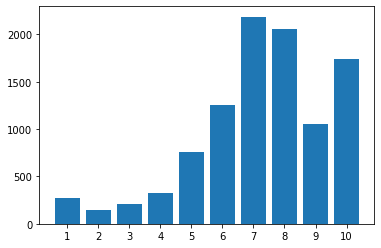

In [18]:
plt.bar(values, counts);

Давайте сделаем график повеселее – поработаем с цветами. Рассмотрим пример готовой цветовой палитры из 10 цветов – палитра *Pink Foam* [отсюда](https://www.heavy.ai/blog/12-color-palettes-for-telling-better-stories-with-your-data)). Если мы хотим использовать все 10 цветов, всё просто: забираем коды всех цветов, сохраняем в список, а затем этот список названий цветов добавляем в опцию `color` у функции `bar()`. Но мы пойдём более сложным путём. Поделим все оценки по-вышкинскому (оценки 1-3 плохие, оценки 4-5 удовлетворительные, 6-7 хорошие, 8-10 отличные) и за каждой категорией закрепим свой цвет:

In [19]:
# чтобы не создавать список с повторяющими значениями,
# копируя названия цветов, воспользуемся тем, что списки можно 
# умножать на число и склеивать друг с другом через +

cc = ["#d7658b"] * 3 + ["#e4bcad"] * 2 + ["#badbdb"] * 2 + ["#76c8c8"] * 3
cc

['#d7658b',
 '#d7658b',
 '#d7658b',
 '#e4bcad',
 '#e4bcad',
 '#badbdb',
 '#badbdb',
 '#76c8c8',
 '#76c8c8',
 '#76c8c8']

Добавляем цвета на график – вписываем список в аргумент `color`: 

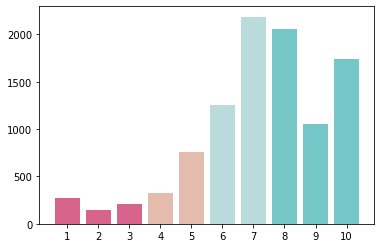

In [20]:
plt.bar(values, counts, color = cc);